127.0


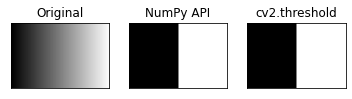

In [15]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE) # 이미지를 그레이 스케일로 읽기

# --- ① NumPy API로 바이너리 이미지 만들기
thresh_np = np.zeros_like(img)   # 원본과 동일한 크기의 0으로 채워진 이미지 - 검정
thresh_np[img > 127] = 255      # 127 보다 큰 값만 255로 변경 - 흰색

# ---② OpenCV API로 바이너리 이미지 만들기
ret, thresh_cv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY) # binary가 기본
print(ret)  # 127.0, 바이너리 이미지에 사용된 문턱 값 반환

# ---③ 원본과 결과물을 matplotlib으로 출력
imgs = {'Original': img, 'NumPy API':thresh_np, 'cv2.threshold': thresh_cv}
for i , (key, value) in enumerate(imgs.items()): # 뒤에 나오는 녀석들에 인덱스 값 주기
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

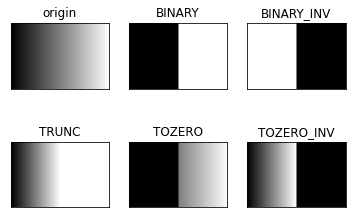

In [17]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/gray_gradient.jpg', cv2.IMREAD_GRAYSCALE)

_, t_bin = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, t_bininv = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
_, t_truc = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
_, t_2zr = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
_, t_2zrinv = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)


imgs = {'origin':img, 'BINARY':t_bin, 'BINARY_INV':t_bininv, 
        'TRUNC':t_truc, 'TOZERO':t_2zr, 'TOZERO_INV':t_2zrinv}

for i, (key, value) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]);    plt.yticks([])
    
plt.show()

어디를 잘라야 할지... 보기 위해서는 히스토그램을 얻은 다음에 끊도록...

오츠 OTSU 알고리즘? 자동으로 끊게 

분산이 적다는 것은 적게 퍼져있다. 적절한 값에 자리잡아있다라는 의미.

따라서 분산이 가장 적게 있는 곳에 있는 것이 오츠 알고리즘 이래...

그래서 가장 작은 분산값을 찾아서 바이너리제이션 해주면 된다네...

otsu threshold: 131.0


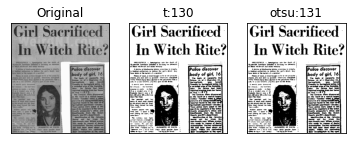

In [35]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# 이미지를 그레이 스케일로 읽기
img = cv2.imread('img/scaned_paper.jpg', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)  # 사람이 130이라는 값       
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, -1, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력
# 옵션 여러개 줄때는 | 를 쓴다.

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

4.3.3

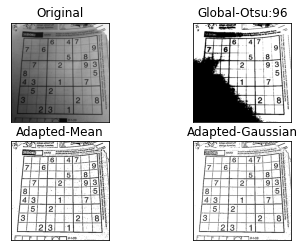

In [34]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5 # 차감 상수 
img = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1,
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

### 4.4 이미지 연산
* dest = cv2.add(src1, src2 [, dest, mask, dtype]): src1과 src2 더하기
    *
    
    
    
    * mask: 0이 아닌 픽셀만 연산

In [37]:
import cv2
import numpy as np

a = np.uint8([[200,50]])
b = np.uint8([[100,100]])
add1 = a + b # overflow 된다!
add2 = cv2.add(a,b) # limit이 알아서 최대값으로 바꿔준다

print(add1, add2)

[[ 44 150]] [[255 150]]


In [42]:
import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)


[[11  0]]
[[11 20]] [[10 20]]


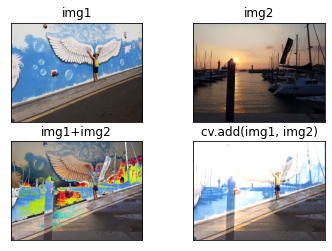

In [45]:
import cv2
import numpy as np
import matplotlib.pylab as plt

# ---① 연산에 사용할 이미지 읽기
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

# ---② 이미지 덧셈
img3 = img1 + img2  # 더하기 연산
img4 = cv2.add(img1, img2) # OpenCV 함수

imgs = {'img1':img1, 'img2':img2, 'img1+img2': img3, 'cv.add(img1, img2)': img4}

# ---③ 이미지 출력
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([]); plt.yticks([])

plt.show()

In [49]:
import cv2
import numpy as np

#---① 합성에 사용할 영상 읽기
img1 = cv2.imread('img/wing_wall.jpg')
img2 = cv2.imread('img/yate.jpg')

alpha = 0.5 # 합성에 사용할 알파 값

# ---② NumPy 배열에 수식을 직접 연산해서 알파 블렌딩 적용
blended = img1 * alpha + img2 * (1-alpha)
blended = blended.astype(np.uint8) # 소수점 발생을 제거하기 위함

# ---③ addWeighted() 함수로 알파 블렌딩 적용
dest = cv2.addWeighted(img1, alpha, img2, (1-alpha), 0)

cv2.imshow('img1 * alpha + img2 * (1-alpha)', blended)
cv2.imshow('cv2.addWeighted', dest)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 위 경우에는 둘 다 똑같다!

In [50]:
import cv2
import numpy as np

win_name = 'Alpha blending'     # 창 이름
trackbar_name = 'fade'          # 트렉바 이름

# ---① 트렉바 이벤트 핸들러 함수
def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0) 
    cv2.imshow(win_name, dst)


# ---② 합성 영상 읽기
img1 = cv2.imread('img/man_face.jpg')
img2 = cv2.imread('img/lion_face.jpg')

# ---③ 이미지 표시 및 트렉바 붙이기
cv2.imshow(win_name, img1)
cv2.createTrackbar(trackbar_name, win_name, 0, 100, onChange)

cv2.waitKey()
cv2.destroyAllWindows()

# 트렉바 다시 돌아가서 공부하자~~

## 4.4.3 비트와이즈 연산
* 


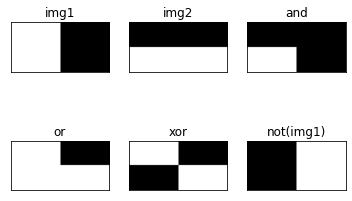

In [56]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 연산에 사용할 이미지 생성
img1 = np.zeros((200,400), dtype=np.uint8)
img2 = np.zeros((200,400), dtype=np.uint8)
img1[:,:200] = 255 # 좌측 절반 흰색으로
img2[100:200, :] = 255 # 아래 절반 흰색으로

#--② 비트와이즈 연산
bitAnd = cv2.bitwise_and(img1, img2)
bitOr = cv2.bitwise_or(img1, img2)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot = cv2.bitwise_not(img1)

#--③ Plot으로 결과 출력
imgs = {'img1':img1, 'img2':img2, 'and':bitAnd, 
          'or':bitOr, 'xor':bitXor, 'not(img1)':bitNot}
for i, (title, img) in enumerate(imgs.items()):
    plt.subplot(2,3,i+1)
    plt.title(title)
    plt.imshow(img, 'gray')
    plt.xticks([]); plt.yticks([])

plt.show()

In [67]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기
img = cv2.imread('img/girl.jpg')

#--② 마스크 만들기 - 이미지와 똑같은 크기로 만들어주어야 한다!
mask = np.zeros_like(img)
cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

#--③ 마스킹
masked = cv2.bitwise_and(img, mask)

#--④ 결과 출력
cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

In [66]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('img/robot_arm1.jpg')
img2 = cv2.imread('img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

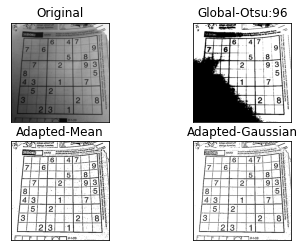

In [3]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('img/sudoku.png', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, 
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

## alpha channel 을 가지면 자연스러운 합성이 가능하다~!

In [11]:
import cv2
import numpy as np 

img_fg = cv2.imread('img/opencv_logo.png', cv2.IMREAD_UNCHANGED)
img_bg = cv2.imread('img/girl.jpg')
#logo 부분에 적용할 마스크, background에 적용할 마스크

#마스크 만들기 스레스홀드로 이미지 뽑아내기!
_, mask = cv2.threshold(img_fg[:,:,3], 1, 255, cv2.THRESH_BINARY) #alpha channel에 관해서만
mask_inv = cv2.bitwise_not(mask)

img_fg = cv2.cvtColor(img_fg, cv2.COLOR_BGRA2BGR)
h, w = img_fg.shape[:2]
roi = img_bg[10:10+h, 10:10+w]

masked_fg = cv2.bitwise_and(img_fg, img_fg, mask=mask) # 원하는 영역만 255가 되어있는거야
masked_bg = cv2.bitwise_and(roi, roi, mask=mask_inv) # log image 하얀거 까만거..

added = masked_fg + masked_bg
img_bg[10:10+h, 10:10+w] = added
cv2.imshow('result', img_bg)
cv2.waitKey()
cv2.destroyAllWindows()

# 단, 포그라운드에 넣으려면, 반드시 알파채널이 존재해야 한다.

# 따라서 앞으로 할 땐.. 특정한 색깔을 이용해서 잘라내던지,
# 아니면 합성 비율을 적절히 조절해서 배경을 합성하던지.
# 알파채널 있는 사진이 얼마나 있겠냐.

* dst = cv2.inRange(img, from, to)  // 색깔의 배열 영역의 색깔 모음을 사용하는거야!
    // 해당 범위의 마스크를 만든거다 라고 생각하면 돼요.
    * img: 입력 영상
    * from: 범위의
    * to: 범위의 끝 배열
    * dst: img가 from~to에 포함되면 255, 아니면 0을 픽셀값으로 하는 배열
    색깔의 범위를 정할때는 hsv로 cvtColor 한다음에 사용한다.
    마찬가지로...

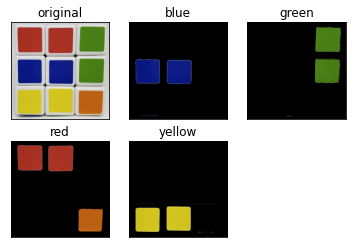

In [12]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])

# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)

#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)

#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green, 
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()


In [16]:
# 크 로 마 키 부 분 . . . . 차근차근 해보자 . . . .
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 크로마키 배경 영상과 합성할 배경 영상 읽기
img1 = cv2.imread('img/man_chromakey.jpg')
img2 = cv2.imread('img/street.jpg')

#--② ROI 선택을 위한 좌표 계산
height1, width1 = img1.shape[:2]
height2, width2 = img2.shape[:2]
x = (width2 - width1)//2
y = height2 - height1
w = x + width1
h = y + height1

#--③ 크로마키 배경 영상에서 크로마키 영역을 10픽셀 정도로 지정
chromakey = img1[:10, :10, :]
offset = 20

#--④ 크로마키 영역과 영상 전체를 HSV로 변경
hsv_chroma = cv2.cvtColor(chromakey, cv2.COLOR_BGR2HSV)
hsv_img = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)

#--⑤ 크로마키 영역의 H값에서 offset 만큼 여유를 두어서 범위 지정
# offset 값은 여러차례 시도 후 결정
#chroma_h = hsv_chroma[0]
chroma_h = hsv_chroma[:,:,0]
lower = np.array([chroma_h.min()-offset, 100, 100])
upper = np.array([chroma_h.max()+offset, 255, 255])

#--⑥ 마스크 생성 및 마스킹 후 합성
mask = cv2.inRange(hsv_img, lower, upper)
mask_inv = cv2.bitwise_not(mask)
roi = img2[y:h, x:w]
fg = cv2.bitwise_and(img1, img1, mask=mask_inv)
bg = cv2.bitwise_and(roi, roi, mask=mask)
img2[y:h, x:w] = fg + bg

#--⑦ 결과 출력
cv2.imshow('chromakey', img1)
cv2.imshow('added', img2)
cv2.waitKey()
cv2.destroyAllWindows()

* des = cv2.seamlessClone(src, dst, mask, coords, flags [,output])
    * src: 입력 영상, 일반적으로 전경
    * dst: 
    

In [ ]:
import cv2
import numpy as np
import matplotlib.pylab as plt
 
#--① 합성 대상 영상 읽기
img1 = cv2.imread("img/drawing.jpg")
img2= cv2.imread("img/my_hand.jpg")

#--② 마스크 생성, 합성할 이미지 전체 영역을 255로 셋팅
mask = np.full_like(img1, 255)
 
#--③ 합성 대상 좌표 계산(img2의 중앙)
height, width = img2.shape[:2]
center = (width//2, height//2)
 
#--④ seamlessClone 으로 합성 
normal = cv2.seamlessClone(img1, img2, mask, center, cv2.NORMAL_CLONE)
mixed = cv2.seamlessClone(img1, img2, mask, center, cv2.MIXED_CLONE)

#--⑤ 결과 출력
cv2.imshow('normal', normal)
cv2.imshow('mixed', mixed)
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5 히스토그램
* cv2.calcHist(img, channel, mask, histSize, ranges)
    * img: 입력 영상, [img]형태로 리스트로 감싸서 표현해야 한다.
    * channel: 처리할 채널, 리스트로 감싸서 표현
        * 1채널: [0], 2, 3채널
    * mask: 마스크에 지정한 픽셀만 히스토그램 계산 (보통 사용 잘 안함)
    * histSize: 계급(bin)의 개수, 채널 개수에 맞게 리스트로 표현
    * ranges: 각 픽셀이 가질 수 있는 값의 범위, RGB인 경우[0,256]

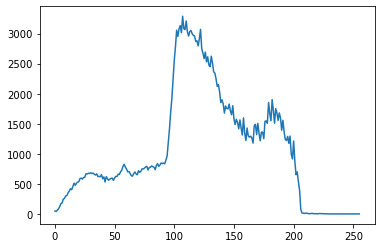

(256, 1)
(450, 600)


In [4]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/mountain.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('img', img)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
plt.plot(hist)
plt.show()
print(hist.shape)
print(img.shape)

cv2.waitKey()
cv2.destroyAllWindows()
# x축 값 0~255 밝기. 0쪽은 어두운, 검정색. 255쪽은 밝은, 하얀색?
# min, max가 0~255 면 스트레칭이 안된다!! 똑같아져요.??? 정확히 무슨말이지

(450, 600, 3)
(450, 600)


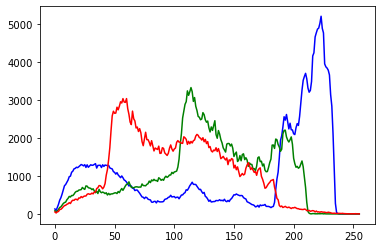

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

channels = cv2.split(img)
print(img.shape)
print(channels[0].shape)
hist_b = cv2.calcHist([channels[0]], [0], None, [256], [0,256])
plt.plot(hist_b, color='b')
hist_g = cv2.calcHist([channels[1]], [0], None, [256], [0,256])
plt.plot(hist_g, color='g')
hist_r = cv2.calcHist([channels[2]], [0], None, [256], [0,256])
plt.plot(hist_r, color='r')

plt.show()
cv2.waitKey()
cv2.destroyAllWindows()
# 세로는 배열에 존재하는 해당 밝기의 픽셀수!? 가로는 밝기 0~255 사이!?

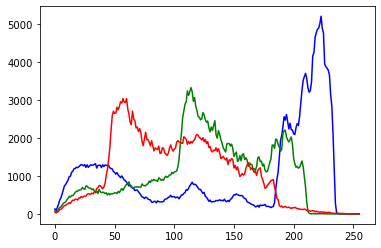

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
channels = cv2.split(img)
colors = ('b', 'g', 'r')
for (ch, color) in zip(channels, colors):
    hist = cv2.calcHist([ch], [0], None, [256], [0, 255])
    plt.plot(hist, color = color)
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

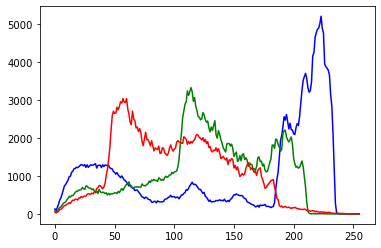

In [1]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 이미지 읽기 및 출력
img = cv2.imread('img/mountain.jpg')
cv2.imshow('img', img)

#--② 히스토그램 계산 및 그리기
colors = ('b', 'g', 'r')
for i in range(3):
    hist = cv2.calcHist([img], [i], None, [256], [0, 255])
    plt.plot(hist, color = colors[i])
plt.show()
cv2.waitKey()
cv2.destroyAllWindows()

## 4.5.2 노멀라이즈
* dst = cv2.normalize(src, dst, alpha, beta, type_flag)


    * MINMAX 만 거의 쓴답니다. 

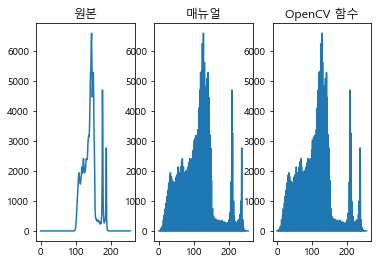

In [9]:
import cv2
import numpy as np
import matplotlib.pylab as plt


img = cv2.imread('img/abnormal.jpg', cv2.IMREAD_GRAYSCALE)

img_f = img.astype(np.float32)
img_norm = ((img_f - img_f.min()) * 255) / (img_f.max() - img_f.min())
img_norm = img_norm.astype(np.uint8)
# 이미지의 픽셀값을 바꾼 것!

img_norm2 = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)

hist = cv2.calcHist([img], [0], None, [256], [0,256])
hist_norm = cv2.calcHist([img_norm], [0], None, [256], [0,256])
hist_norm2 = cv2.calcHist([img_norm2], [0], None, [256], [0,256])

cv2.imshow('Befor', img)
cv2.imshow('Manual', img_norm)
cv2.imshow('cv2.normalize()', img_norm2)

hists = {'원본' : hist, '매뉴얼':hist_norm, 'OpenCV 함수':hist_norm2}
for i, (k, v) in enumerate(hists.items()):
    plt.subplot(1,3,i+1)
    plt.title(k)
    plt.plot(v)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()